In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Neural networks - sequential

Additional resource:  https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5


## Heart disease data set

We will try to predict the target value of heart disease.  1 = heart disease, 0 = not heart disease.

## Step 1: Import the data, test/train split, and scale it.

We standardize the data set so that it behaves more smoothly for Stochastic Gradient Descent.

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/heart.csv')
df.sample(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0


In [25]:
from sklearn.model_selection import train_test_split
X= df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [26]:
from sklearn.model_selection import train_test_split
X= df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Step 2: Null model
The majority class is heart disease.  How likely are we to be right if we assume everyone in the data set has heart disease?

Looks to be 54% of our data in the training set has heart disease, so that's our null rate we hope to beat.

In [27]:
sum(y_train)/len(y_train)

0.5441176470588235

## Decision Tree


100%|██████████| 19/19 [00:00<00:00, 57.69it/s]


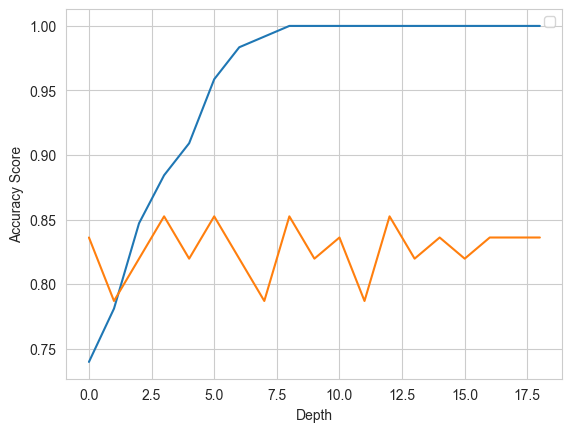

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 
import matplotlib.pyplot as plt

train = []
test = []

for depth in tqdm(range(1,20)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)

    y_pred_test = model.predict(X_test)
    train.append(accuracy_score(y_train, y_pred_train))
    test.append(accuracy_score(y_test, y_pred_test))

plt.plot(train)
plt.plot(test)
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()
# confusion_matrix(y_test, y_pred)
# print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))
# print(classification_report(y_test, y_pred))

100%|██████████| 19/19 [00:00<00:00, 55.64it/s]


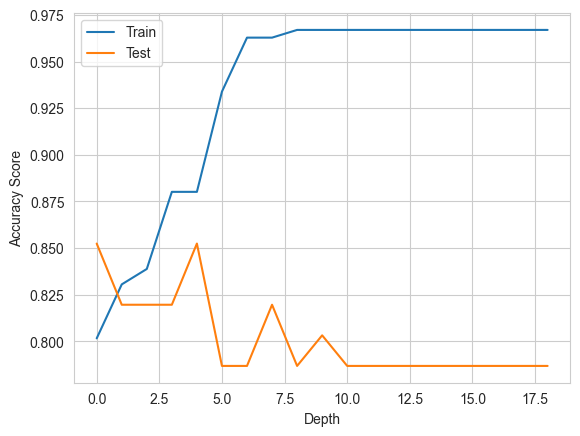

In [29]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 


train = []
test = []

for depth in tqdm(range(1,20)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    model = RandomForestClassifier(max_depth = depth, n_estimators = 5, random_state = 42, max_features = 3)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)

    y_pred_test = model.predict(X_test)
    train.append(accuracy_score(y_train, y_pred_train))
    test.append(accuracy_score(y_test, y_pred_test))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()

In [30]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 


train = []
test = []
depth = []
features = []
estimators = []
for dep in tqdm(range(1,20, 4)):
    for feature in range(1,10, 3):
        for estim in range(1,20, 4):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

            model = RandomForestClassifier(max_depth = dep, n_estimators = estim, 
                                           random_state = 42, max_features = feature)
            model.fit(X_train, y_train)

            y_pred_train = model.predict(X_train)

            y_pred_test = model.predict(X_test)
            train.append(accuracy_score(y_train, y_pred_train))
            test.append(accuracy_score(y_test, y_pred_test))
            depth.append(dep)
            features.append(feature)
            estimators.append(estim)
best_one = max(enumerate(test),key=lambda x: x[1])[0]
print(f"Best Test Accuracy: {test[best_one]} ")
print(f"Best Train Accuracy: {train[best_one]} ")

print(f"Best Max_Depth: {depth[best_one]} ")
print(f"Best Max_Features: {features[best_one]} ")

print(f"Best N_estimators: {estimators[best_one]} ")
# plt.plot(train, label = 'Train')
# plt.plot(test, label = 'Test')
# plt.xlabel("Depth")
# plt.ylabel("Accuracy Score")
# plt.legend()

100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

Best Test Accuracy: 0.8852459016393442 
Best Train Accuracy: 0.7892561983471075 
Best Max_Depth: 1 
Best Max_Features: 4 
Best N_estimators: 17 


## Step 4: Building a neural network for classification

We will use the keras and tensorflow packages, rather than sklearn.

We have to decide on the structure of our neural network, but there are some basic guidelines.

* There are 13 columns in the data, so there are 13 input nodes for the first layer.
* All of those go into activation functions.
* 'relu' is a useful/efficient activiation function, but 'sigmoid' is handy for the last one because it is bounded between 0 and 1, making it easier to interpret.

* If we have 5 activation functions in the first (hidden) layer, that is (13+1)*5 = 70 betas to figure out.  Each layer adds many more coefficients / weights to determine.

* The final layer will have 1 node because that is probability of having heart disease.  (For the written digits problem, there were 10 because there were 10 classification options)


**Sequential**
* Our first example is a sequential neural network.  Alternatives to sequential (a.k.a. feed forward neural network) are recursive neural networks (looping) or convolution neural networks (part of the data each time... convolution is good for image processing)
*  If we are doing a yes/no classifier, our last activation function is probably a sigmoid or something like that.

**model.add**

*  model.add(Dense(# of notes in hidden layer, input dimension, activation function))
* relu is a popular option... google more
*  https://en.wikipedia.org/wiki/Rectifier_(neural_networks)... relu
* The output layer is the one with 1 number coming out, using the sigmoid activation.
*  If you were doing the 8 pixel by 8 pixel handwritten digits, you would have 64 (pixels) input and 10 outputs (numbers)

In [31]:
#In this section we design the neural network, but don't run data through it yet.
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import warnings
# dense means every node is connected to every next node to the right
warnings.simplefilter("ignore")
# inputs = Input(shape=(784,))                 # input layer
# x = Dense(32, activation='relu')(inputs)     # hidden layer
# outputs = Dense(10, activation='softmax')(x) # output layer
# 
# model = Model(inputs, outputs)

# Neural network
# first define the type of model: A sequential neural network in this case
model = Sequential()

model.add(Dense(12, input_dim=13, activation='relu'))
# 5= number of activations in the first hidden layer
# 13 = # of predictors
# they are all the same activation function, 'relu'

model.add(Dense(10, activation ='relu'))  # these are the lego blocks... second layer has 7 nodes
#model.add(Dense(10, activation='relu'))  # 3rd layer... this one has 10 nodes.

model.add(Dense(1, activation='sigmoid'))  # last layer

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])
# there are lots of loss functions, pick this one for now.  This is how we minimize error.
# SGD = stochastic gradient descent
# tensor flows package, keras subpackage, get optimizers, choose SGD...
# If we just do sgd (lower case) instead of the full name "tf.keras.optimizers.SGD",
# we lose control of the learning rate

model.summary()
## This will indicate how many parameters need training
## We still haven't give the network any data yet.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309 (1.21 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the neural network

This is where we feed in the data.  This is the part that can take a long time to run.

In [33]:
from sklearn.model_selection import train_test_split
X= df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
y_train

284    0
198    0
42     1
17     1
168    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 272, dtype: int64

In [35]:
fittedModel = model.fit(X_train_scaled,
                        y_train,
                        epochs=40, #how many loops it is going to run
                        verbose=1)
# epochs is how many times to rerun the whole thing, improving the betas each time
# Default is epochs=1, which is dumb.

Epoch 1/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4903 - loss: 0.7647
Epoch 2/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5085 - loss: 0.7441
Epoch 3/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5184 - loss: 0.7294
Epoch 4/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5529 - loss: 0.7182
Epoch 5/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5732 - loss: 0.6977
Epoch 6/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5311 - loss: 0.7012
Epoch 7/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5504 - loss: 0.6778
Epoch 8/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6283 - loss: 0.6549
Epoch 9/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5851 - loss: 0.6882
Epoch 10/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6164 - loss: 0.6607
Epoch 11/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - loss: 0.6500
Epoch 12/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6494 - loss: 0.6515
Epoch 13/40
9

## Step 6:  Check for accuracy

In [36]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.7742 - loss: 0.4800


[0.4800027906894684, 0.774193525314331]

In [37]:
predictions = model.predict(X_test_scaled)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.38330576],
       [0.5005372 ],
       [0.44469103],
       [0.26801842],
       [0.7696264 ],
       [0.7561065 ],
       [0.58001256],
       [0.11208903],
       [0.22012837],
       [0.42514947],
       [0.6572912 ],
       [0.2156393 ],
       [0.71971774],
       [0.3734489 ],
       [0.8878962 ],
       [0.7958495 ],
       [0.8890878 ],
       [0.26895398],
       [0.24571276],
       [0.25675192],
       [0.50187755],
       [0.24361734],
       [0.43787345],
       [0.70156944],
       [0.6983433 ],
       [0.66480064],
       [0.52591145],
       [0.57252365],
       [0.14515318],
       [0.8534577 ],
       [0.30310827]], dtype=float32)

<Axes: xlabel='age', ylabel='predPercent'>

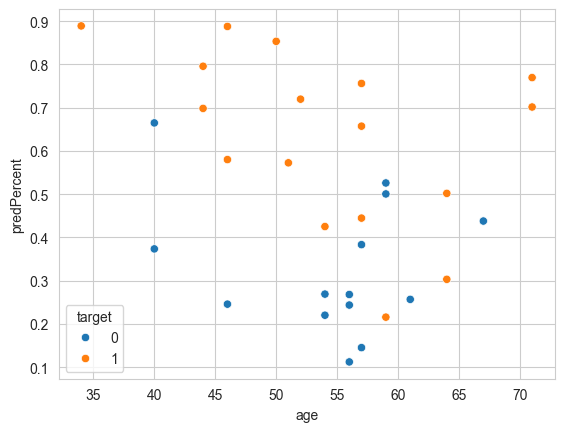

In [38]:
import seaborn as sns
testDataWithPred = pd.DataFrame(X_test)
testDataWithPred['target'] = y_test
testDataWithPred['predPercent'] = predictions
testDataWithPred['predCat'] = (testDataWithPred['predPercent'] >.5)
testDataWithPred['correct'] = (testDataWithPred['target']==testDataWithPred['predCat'])
testDataWithPred
sns.scatterplot(data=testDataWithPred, x='age', y='predPercent', hue='target')

In [39]:
testDataWithPred.columns
testDataWithPred['predCat']

179    False
228     True
111    False
246    False
60      True
9       True
119     True
223    False
268    False
33     False
5       True
101    False
45      True
175    False
118     True
46      True
125     True
192    False
285    False
279    False
152     True
269    False
272    False
25      True
146     True
283     True
254     True
73      True
231    False
109     True
139    False
Name: predCat, dtype: bool

### Your turn: Build a confusion matrix


In [40]:
confusion_matrix(testDataWithPred['target'], testDataWithPred['predCat'])

array([[11,  3],
       [ 4, 13]])

Unpacking those code from above.

model.compile(
  * loss=keras.losses.binary_crossentropy,
     * which loss function to use (loss function is the cost function for our errors)
     * Could use sparse_categorical_crossentropy if you had more than 2 categories.
  * optimizer=keras.optimizers.Adam(learning_rate=0.01),
     * Adam is version of stochastistic gradient descent that has been optimized to avoid getting stuck
     * Learning rate, smaller is slower on the gradient descent,
     * If the learning rate is too small, you never get to your minimum and if its too big, you might step over the minimum
  *  metrics=['accuracy'])
     * For classification, accuracy is good
     * For regression, MSE is good.

# Neural networks for penguins

Suppose we want to predict species.  What will be different about this data set than the prior one?

* Output should be one of 3 species.
* Inputs contain categories and numbers... fix that.  When using get_dummies, does it matter if we do drop_first=True?

In [ ]:
import pandas as pd
penguins = pd.read_csv('data/penguins2.csv')
penguins

In [ ]:
X = penguins.drop('species', axis=1)
y= penguins['species']
X = pd.get_dummies(X,drop_first=True)
X
## Does y have to be numbers?  Or will words work?
# Nope.  Needs to be numbers.
y=y.replace(['Adelie','Chinstrap','Gentoo'],[0,1,2])
y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
penguin_model = Sequential()

penguin_model.add(Dense(16, input_dim=7, activation='relu'))
# penguin_model.add(Dense(8, activation ='relu'))
# penguin_model.add(Dense(8, activation='relu'))
penguin_model.add(Dense(3, activation='softmax'))  # last layer

What is softmax?  https://en.wikipedia.org/wiki/Softmax_function

"The softmax function takes as input a vector **z** of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval $(0,1)$ and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities."

In [ ]:
penguin_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
penguin_model.fit(X_train_scaled, y_train, epochs=3,verbose=1)
print("Evaluation of model ===> (test loss, test accuracy)", penguin_model.evaluate(X_test_scaled,y_test))

In [ ]:
penguin_model.evaluate(X_test_scaled,y_test)

## Build a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
test_predictions = penguin_model.predict(X_test_scaled)
test_predictions_label = test_predictions.argmax(axis=1)
print(confusion_matrix(y_test, test_predictions_label))

# Your Turn: Digits classification - a classic example

We've built a few digit classification models with support vector machines.  Let's try it with neural networks.

Design 3 different neural networks for the digit classification task.  Use an 80/20 train/test split for each (with the same seed) and see if there is any difference in performance levels.

Hyperparameters for you to adjust:
* Number of hidden layers
* Size of hidden layers
* Activation functions (sigmoid, relu, softmax)
* Learning rate
* Optimizers (like stochastic gradient descent (SGD) or Adam).

In the end, provide your accuracy results for the testing and training data, and provide a confusion matrix for each.

## Build a model

In [44]:
from sklearn.datasets import load_digits

digits = load_digits()

In [45]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(128, input_dim=64, activation='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))  # last layer

In [50]:
## Train the model
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=3,verbose=1)
print("Evaluation of model ===> (test loss, test accuracy)", model.evaluate(X_test_scaled,y_test))

Epoch 1/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7019 - loss: 0.9764
Epoch 2/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9560 - loss: 0.1491
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9801 - loss: 0.0813
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.9802 - loss: 0.0869
Evaluation of model ===> (test loss, test accuracy) [0.1287413388490677, 0.9750000238418579]


In [ ]:
## Get accuracy scores
model.evaluate(X_test_scaled,y_test)

## Build a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
test_predictions = model.predict(X_test_scaled)
test_predictions_label = test_predictions.argmax(axis=1)
print(confusion_matrix(y_test, test_predictions_label))

# Playing with tensor flow

Follow this link for an interactive page on tensor flow.

https://playground.tensorflow.org/

And here is one for convolutional neural networks (CNN)

https://poloclub.github.io/cnn-explainer/.